In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import yfinance as yf

In [10]:
start='2017-11-14'
end='2023-11-03'
df=yf.download("BTC-USD",start,end).tail(1000)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896
...,...,...,...,...,...,...
2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810


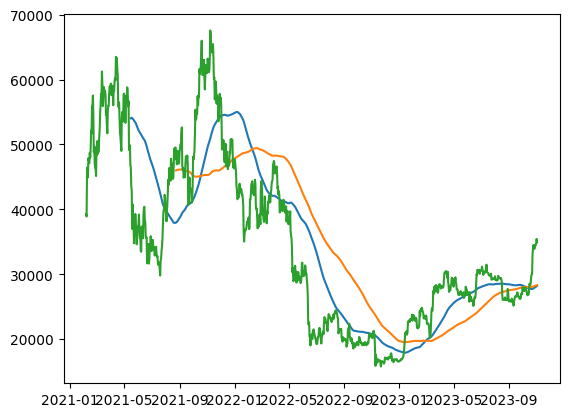

In [11]:
avg100=df.Close.rolling(100).mean()
avg200=df.Close.rolling(200).mean()
closing=df["Close"]
plt.plot(avg100)
plt.plot(avg200)
plt.plot(closing)

In [12]:
data_training,data_testing=np.split(df["Close"],[int(len(df)*0.7)])
print(data_training.shape)
data_testing

(700,)


c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Date
2023-01-07    16955.078125
2023-01-08    17091.144531
2023-01-09    17196.554688
2023-01-10    17446.292969
2023-01-11    17934.896484
                  ...     
2023-10-29    34538.480469
2023-10-30    34502.363281
2023-10-31    34667.781250
2023-11-01    35437.253906
2023-11-02    34938.242188
Name: Close, Length: 300, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

# Convert the Series to a NumPy array and then reshape
data_training = np.array(data_training).reshape(-1, 1)
data_testing = np.array(data_testing).reshape(-1, 1)

data_training = scaler.fit_transform(data_training)
data_testing = scaler.fit_transform(data_testing)

data_testing

array([[0.        ],
       [0.00736203],
       [0.01306538],
       [0.02657776],
       [0.05301423],
       [0.10358682],
       [0.15985651],
       [0.21757291],
       [0.21240577],
       [0.22803347],
       [0.22759449],
       [0.20201643],
       [0.22355132],
       [0.30956716],
       [0.31503579],
       [0.31194043],
       [0.32352   ],
       [0.30739837],
       [0.33344458],
       [0.32884111],
       [0.33132735],
       [0.32874981],
       [0.36897649],
       [0.31841817],
       [0.33460374],
       [0.36622806],
       [0.3525988 ],
       [0.35137877],
       [0.34502266],
       [0.32466891],
       [0.31408809],
       [0.34136743],
       [0.32378873],
       [0.26317036],
       [0.25408835],
       [0.26597501],
       [0.26150195],
       [0.26257858],
       [0.28490837],
       [0.39782998],
       [0.36080149],
       [0.41177638],
       [0.41587091],
       [0.39890133],
       [0.4260359 ],
       [0.40478326],
       [0.39139145],
       [0.378

#### Dividing the data into x_train and y_train

In [14]:
x_train=[]
y_train=[]

for i in range(100,int(data_training.shape[0])):
    x_train.append(data_training[i-100:i]) ## n-100th day to nth day
    y_train.append(data_training[i])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(600, 100, 1)
(600, 1)


#### ML MODEL

In [15]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))  # Remove input_shape here
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))  # Remove input_shape here
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=False))  # Set return_sequences=False for the final LSTM
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#fitting data into model
model.fit(x_train,y_train,epochs=20)


Epoch 1/20
19/19 [==============================] - 34s 861ms/step - loss: 0.1003
Epoch 2/20
19/19 [==============================] - 17s 878ms/step - loss: 0.0302
Epoch 3/20
19/19 [==============================] - 18s 964ms/step - loss: 0.0172
Epoch 4/20
19/19 [==============================] - 17s 860ms/step - loss: 0.0164
Epoch 5/20
19/19 [==============================] - 16s 844ms/step - loss: 0.0139
Epoch 6/20
19/19 [==============================] - 16s 864ms/step - loss: 0.0147
Epoch 7/20
19/19 [==============================] - 16s 849ms/step - loss: 0.0127
Epoch 8/20
19/19 [==============================] - 16s 850ms/step - loss: 0.0095
Epoch 9/20
19/19 [==============================] - 18s 952ms/step - loss: 0.0110
Epoch 10/20
19/19 [==============================] - 16s 825ms/step - loss: 0.0094
Epoch 11/20
19/19 [==============================] - 16s 849ms/step - loss: 0.0106
Epoch 12/20
19/19 [==============================] - 16s 814ms/step - loss: 0.0106
Epoch 13/20
1

In [16]:
model.save("keras_stockmodelfin.h5")

c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Testing the Model

In [17]:
past100days = data_training[-100:]  # Select the last 100 days from data_training
final_testing_data = np.concatenate((past100days, data_testing), axis=0)
type(final_testing_data)

numpy.ndarray

In [18]:
input_data = final_testing_data.reshape(-1, 1)
input_data = scaler.fit_transform(input_data)
 
# Splitting the data into x_test and Y_test
x_test = []
y_test = []

for i in range(100, int(input_data.shape[0])):
    x_test.append(input_data[i-100:i])  # n-100th day to nth day
    y_test.append(input_data[i])

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(300, 100, 1)
(300, 1)


In [19]:
y_predict=model.predict(x_test)

scale_factor=1/scaler.scale_

y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

print(y_predict.shape)
print(y_predict)


10/10 [==============================] - 15s 358ms/step
(300, 1)
[[0.01826144]
 [0.01820523]
 [0.01814911]
 [0.01809169]
 [0.01803756]
 [0.01800625]
 [0.01805254]
 [0.01831231]
 [0.01911708]
 [0.02077542]
 [0.02348769]
 [0.02810754]
 [0.03551893]
 [0.04517757]
 [0.057588  ]
 [0.07345016]
 [0.09271763]
 [0.11472696]
 [0.13867204]
 [0.1636187 ]
 [0.18833566]
 [0.21175888]
 [0.2330265 ]
 [0.25211832]
 [0.26848161]
 [0.2818661 ]
 [0.29272506]
 [0.30144635]
 [0.30834404]
 [0.31358165]
 [0.31699586]
 [0.31834492]
 [0.31796318]
 [0.31611905]
 [0.31226149]
 [0.30586922]
 [0.29703605]
 [0.28625652]
 [0.2742444 ]
 [0.26204801]
 [0.25205764]
 [0.24588482]
 [0.24499233]
 [0.25005221]
 [0.26060534]
 [0.27588263]
 [0.29418492]
 [0.31342468]
 [0.33163652]
 [0.34680924]
 [0.35762843]
 [0.36391696]
 [0.36614135]
 [0.36471167]
 [0.36067572]
 [0.35502902]
 [0.3477731 ]
 [0.33884871]
 [0.32847121]
 [0.31708083]
 [0.30509645]
 [0.29263318]
 [0.27897841]
 [0.26357743]
 [0.24663737]
 [0.22968167]
 [0.2155266

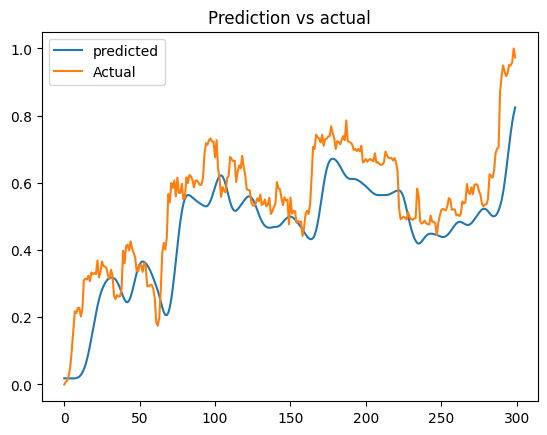

In [20]:
plt.plot(y_predict)
plt.plot(y_test)
plt.title("Prediction vs actual")
plt.legend(["predicted","Actual"])

(152, 100, 1)


5/5 [==============================] - 2s 342ms/step
(152, 1)
(252, 1)


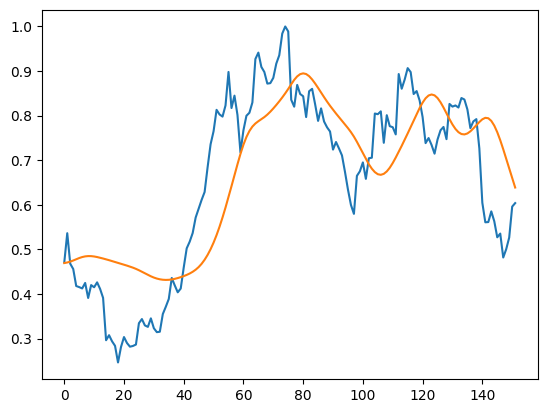

In [196]:
dft=pd.read_csv("TSLA.csv")
col=np.array(dft["Close"])

col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
# Splitting the data into x_test and Y_test
inp = []

for i in range(100, int(len(col))):
    inp.append(col[i-100:i])  # n-100th day to nth day

inp=np.array(inp)
print(inp.shape)

op=model.predict(inp)



plt.plot(col[100:])
plt.plot(op*scale_factor)
print(op.shape)
print(col.shape)

(100,)


1/1 [==============================] - 0s 141ms/step


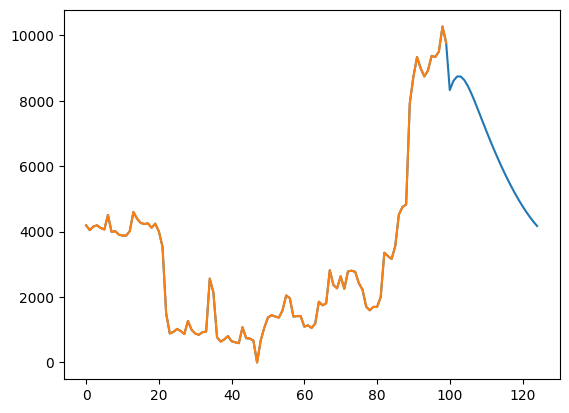

In [21]:
col=np.array(df["Close"])[-100:]
print(col.shape)
col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
inp=col
inp=inp.reshape(1,100,1)

op=[]
for p in range(25):
    val=model.predict(inp);
    op.append(val)
    inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
    inp = inp[:, 1:, :]
    
op=np.array(op)
finval=np.concatenate((col.reshape(100,1,1),op)).ravel()
finval.shape
scale_factor=1/scaler.scale_
plt.plot(finval*scale_factor)
plt.plot(col*scale_factor)

[*********************100%%**********************]  1 of 1 completed
(100,)
1/1 [==============================] - 0s 106ms/step


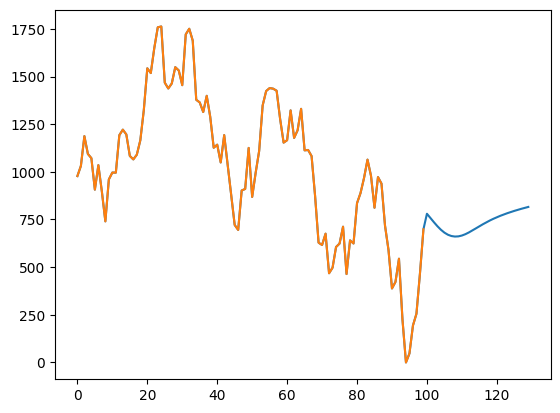

In [239]:
start='2019-11-14'
end='2023-11-03'
df1=yf.download("^IXIC",start,end)
col=np.array(df1["Close"])[-100:]
print(col.shape)
col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
inp=col
inp=inp.reshape(1,100,1)

op=[]
for p in range(30):
    val=model.predict(inp);
    op.append(val)
    inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
    inp = inp[:, 1:, :]
    
op=np.array(op)
finval=np.concatenate((col.reshape(100,1,1),op)).ravel()
finval.shape
scale_factor=1/scaler.scale_
plt.plot(finval*scale_factor)
plt.plot(col*scale_factor)

In [251]:
start='2019-11-14'
end='2023-11-03'
df1=yf.download("^IXIC",start,end)
def pred():
    col = np.array(df1["Close"])[-100:]
    col = col.reshape(-1, 1)
    col = scaler.fit_transform(col)

    inp = col
    inp = inp.reshape(1, 100, 1)

    op = []
    for p in range(30):
        val = model.predict(inp)
        op.append(val)
        inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
        inp = inp[:, 1:, :]

    op = np.array(op)
    finval = np.concatenate((col.reshape(100, 1, 1), op), axis=0).ravel()
    print(finval.shape)
    scale_factor = 1 / scaler.scale_
    plt.plot(finval * scale_factor)
    plt.plot(col * scale_factor)
    plt.title("Next 30 days")
    plt.legend(["Next 30", "Values so far"])

    
def acc_sf():
    col=np.array(df1["Close"])
    col = col.reshape(-1, 1)
    col = scaler.fit_transform(col)
    scale_factor=1/scaler.scale_
    # Splitting the data into x_test and Y_test
    inp = []

    for i in range(100, int(len(col))):
        inp.append(col[i-100:i])  # n-100th day to nth day

    inp=np.array(inp)
    print(inp.shape)

    op=model.predict(inp)


    plt.plot(col[100:]*scale_factor)
    plt.plot(op*scale_factor)
    plt.title("ACCURACY SO FAR")
    plt.legend(["predicted","Actual"])
    

[*********************100%%**********************]  1 of 1 completed


(899, 100, 1)
29/29 [==============================] - 10s 328ms/step


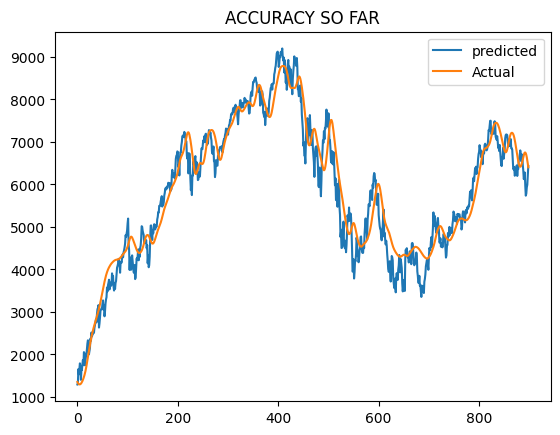

In [250]:
acc_sf()

1/1 [==============================] - 0s 89ms/step
(130,)


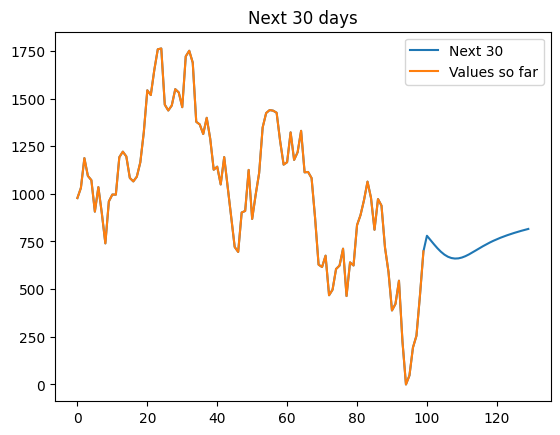

In [252]:
pred()

### Training model for Financial websites


In [253]:
dff=yf.download("BTC-USD",start,end)
data_training,data_testing=np.split(dff["Close"],[int(len(df)*0.7)])

[*********************100%%**********************]  1 of 1 completed


c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
